In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [99]:
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [100]:
test_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


# EDA 

In [101]:
train_df= train_df.drop(["registered","casual"], axis=1)

* Extract datetime features

In [102]:
train_df['datetime'] = pd.to_datetime(train_df['datetime'])

In [103]:
train_df['hour'] = train_df['datetime'].dt.hour
train_df['day'] = train_df['datetime'].dt.day
train_df['month'] = train_df['datetime'].dt.month
train_df['year'] = train_df['datetime'].dt.year
train_df['weekday'] = train_df['datetime'].dt.weekday

In [104]:
train_df.drop('datetime', axis=1, inplace=True)

In [105]:
train_df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,day,month,year,weekday
0,1,0,0,1,9.84,14.395,81,0.0000,16,0,1,1,2011,5
1,1,0,0,1,9.02,13.635,80,0.0000,40,1,1,1,2011,5
2,1,0,0,1,9.02,13.635,80,0.0000,32,2,1,1,2011,5
3,1,0,0,1,9.84,14.395,75,0.0000,13,3,1,1,2011,5
4,1,0,0,1,9.84,14.395,75,0.0000,1,4,1,1,2011,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,336,19,19,12,2012,2
10882,4,0,1,1,14.76,17.425,57,15.0013,241,20,19,12,2012,2
10883,4,0,1,1,13.94,15.910,61,15.0013,168,21,19,12,2012,2
10884,4,0,1,1,13.94,17.425,61,6.0032,129,22,19,12,2012,2


Text(0, 0.5, 'Frequency')

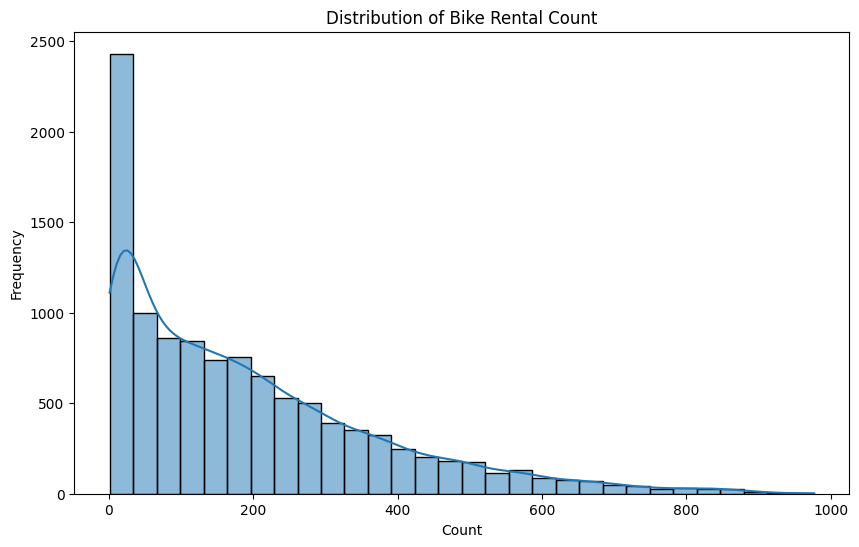

In [106]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['count'], bins=30, kde=True)
plt.title('Distribution of Bike Rental Count')
plt.xlabel('Count')
plt.ylabel('Frequency')

In [107]:
train_df['count_log'] = np.log1p(train_df['count'])

Text(0.5, 1.0, 'Distribution of log-transformed Count')

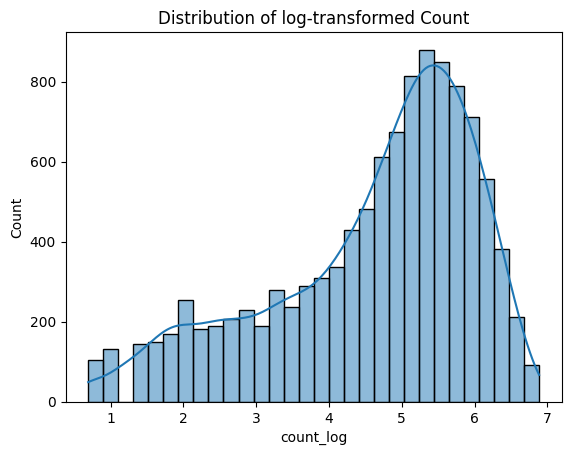

In [108]:
sns.histplot(train_df['count_log'], bins=30, kde=True)
plt.title('Distribution of log-transformed Count')

In [109]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   count       10886 non-null  int64  
 9   hour        10886 non-null  int32  
 10  day         10886 non-null  int32  
 11  month       10886 non-null  int32  
 12  year        10886 non-null  int32  
 13  weekday     10886 non-null  int32  
 14  count_log   10886 non-null  float64
dtypes: float64(4), int32(5), int64(6)
memory usage: 1.0 MB


In [110]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.506614,1.116174,1.000000,2.0000,3.000000,4.000000,4.00000
holiday,10886.0,0.028569,0.166599,0.000000,0.0000,0.000000,0.000000,1.00000
workingday,10886.0,0.680875,0.466159,0.000000,0.0000,1.000000,1.000000,1.00000
weather,10886.0,1.418427,0.633839,1.000000,1.0000,1.000000,2.000000,4.00000
temp,10886.0,20.230860,7.791590,0.820000,13.9400,20.500000,26.240000,41.00000
atemp,10886.0,23.655084,8.474601,0.760000,16.6650,24.240000,31.060000,45.45500
humidity,10886.0,61.886460,19.245033,0.000000,47.0000,62.000000,77.000000,100.00000
windspeed,10886.0,12.799395,8.164537,0.000000,7.0015,12.998000,16.997900,56.99690
count,10886.0,191.574132,181.144454,1.000000,42.0000,145.000000,284.000000,977.00000
hour,10886.0,11.541613,6.915838,0.000000,6.0000,12.000000,18.000000,23.00000


Text(0, 0.5, 'Log of Count')

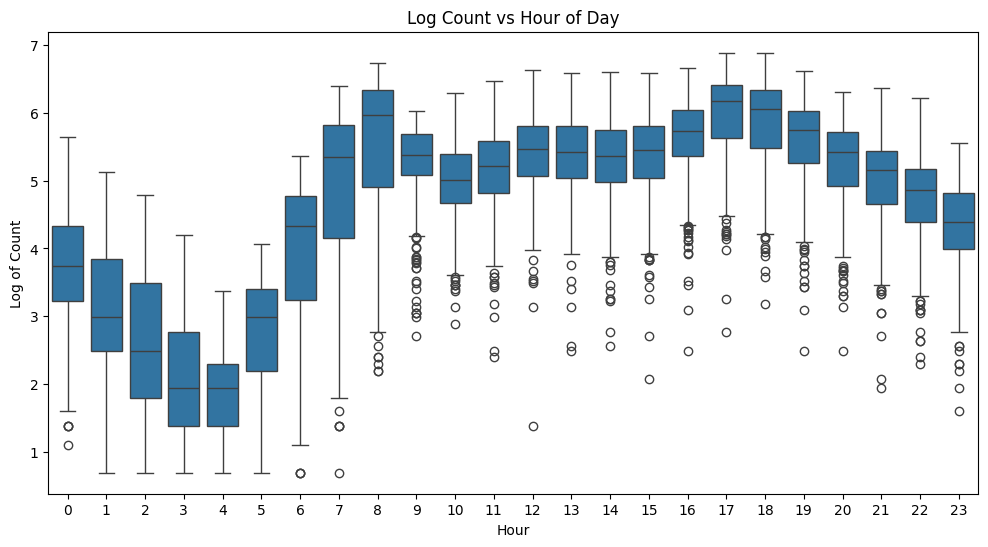

In [111]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_df, x='hour', y='count_log')
plt.title('Log Count vs Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Log of Count')

Text(0, 0.5, 'Log of Count')

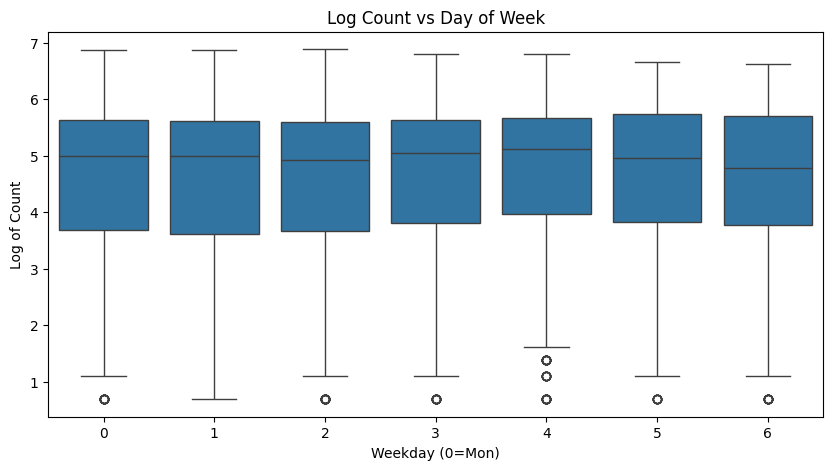

In [112]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=train_df, x='weekday', y='count_log')
plt.title('Log Count vs Day of Week')
plt.xlabel('Weekday (0=Mon)')
plt.ylabel('Log of Count')

Text(0, 0.5, 'Log of Count')

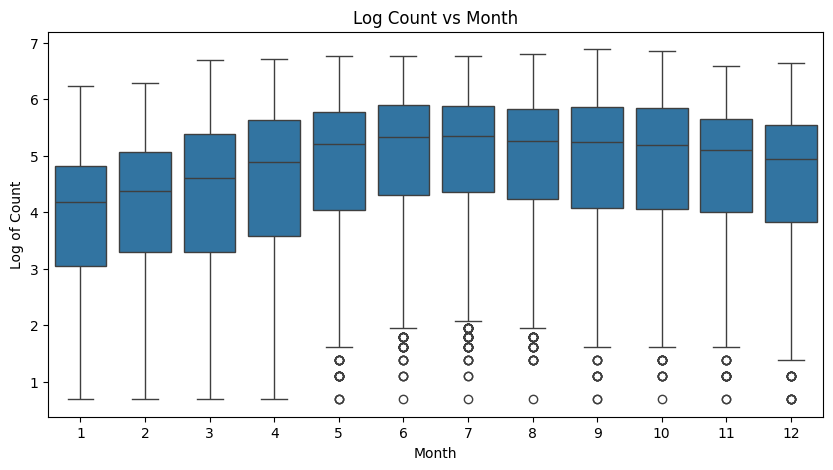

In [113]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=train_df, x='month', y='count_log')
plt.title('Log Count vs Month')
plt.xlabel('Month')
plt.ylabel('Log of Count')

In [114]:
train_df.drop(['count'], axis=1, inplace=True)

In [115]:
train_df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,day,month,year,weekday,count_log
0,1,0,0,1,9.84,14.395,81,0.0000,0,1,1,2011,5,2.833213
1,1,0,0,1,9.02,13.635,80,0.0000,1,1,1,2011,5,3.713572
2,1,0,0,1,9.02,13.635,80,0.0000,2,1,1,2011,5,3.496508
3,1,0,0,1,9.84,14.395,75,0.0000,3,1,1,2011,5,2.639057
4,1,0,0,1,9.84,14.395,75,0.0000,4,1,1,2011,5,0.693147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,19,19,12,2012,2,5.820083
10882,4,0,1,1,14.76,17.425,57,15.0013,20,19,12,2012,2,5.488938
10883,4,0,1,1,13.94,15.910,61,15.0013,21,19,12,2012,2,5.129899
10884,4,0,1,1,13.94,17.425,61,6.0032,22,19,12,2012,2,4.867534


# Model 

In [123]:
from sklearn.model_selection import train_test_split

In [124]:
X = train_df.drop('count_log', axis=1)

In [125]:
y = train_df['count_log']

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [127]:
from sklearn.ensemble import RandomForestRegressor

In [128]:
rf = RandomForestRegressor(random_state=42)

In [129]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [130]:
y_pred = rf.predict(X_test)

In [136]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [137]:
mae = mean_absolute_error(y_test, y_pred)

In [133]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [135]:
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

MAE: 0.19997800274106317
RMSE: 0.30430099222479445


In [134]:
train_df["count_log"].mean()

np.float64(4.591363690454027)

In [138]:
r2_score(y_test, y_pred)

0.9550163420156407

# Grid search 

In [146]:
from sklearn.model_selection import GridSearchCV

In [147]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 20, 40],
    'max_features': ['sqrt'],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2],
}

In [148]:
rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf, 
                           param_grid=param_grid,
                           cv=3,         # 3-fold cross-validation
                           scoring='neg_mean_squared_error',
                           n_jobs=-1,    # Use all CPU cores
                           verbose=2)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 20, 40], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=2)

In [149]:
best_model = grid_search.best_estimator_

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [151]:
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

MAE: 0.3058649154836382
RMSE: 0.42086197911033535
R² Score: 0.9139546475404899


In [153]:
# Base model is good 

In [161]:
from sklearn.ensemble import RandomForestRegressor
import joblib

# X = features (drop 'count' and 'count_log')
# y = target 'count_log'
X = train_df.drop([ 'count_log'], axis=1)
y = train_df['count_log']

# Fit the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Now save it
joblib.dump(model, 'bike_demand_model.pkl')


['bike_demand_model.pkl']

In [162]:
def predict_count(input_dict):
    import pandas as pd
    import numpy as np
    import joblib

    # Load the trained model
    model = joblib.load('bike_demand_model.pkl')

    # Convert input to DataFrame
    input_df = pd.DataFrame([input_dict])

    # Predict log(count)
    log_pred = model.predict(input_df)

    # Convert back to actual count
    return round(np.expm1(log_pred)[0])


In [166]:
sample_input = {
    'season': 1,
    'holiday': 0,
    'workingday': 0,
    'weather': 1,
    'temp': 9.81,
    'atemp': 14.0,
    'humidity': 80,
    'windspeed': 0.0,
    'hour': 0,
    'day': 1,
    'month': 1,
    'year': 2011,
    'weekday': 5
}

predicted_count = predict_count(sample_input)
print("Predicted bike rentals:", predicted_count)


Predicted bike rentals: 28


In [165]:
train_df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,day,month,year,weekday,count_log
0,1,0,0,1,9.84,14.395,81,0.0000,0,1,1,2011,5,2.833213
1,1,0,0,1,9.02,13.635,80,0.0000,1,1,1,2011,5,3.713572
2,1,0,0,1,9.02,13.635,80,0.0000,2,1,1,2011,5,3.496508
3,1,0,0,1,9.84,14.395,75,0.0000,3,1,1,2011,5,2.639057
4,1,0,0,1,9.84,14.395,75,0.0000,4,1,1,2011,5,0.693147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,19,19,12,2012,2,5.820083
10882,4,0,1,1,14.76,17.425,57,15.0013,20,19,12,2012,2,5.488938
10883,4,0,1,1,13.94,15.910,61,15.0013,21,19,12,2012,2,5.129899
10884,4,0,1,1,13.94,17.425,61,6.0032,22,19,12,2012,2,4.867534
